# Create class specific datasets
Images are cropped to bbox, sized specifically to 200x200 for input

In [6]:
import os
import imutils
import matplotlib.pyplot as plt

In [2]:
# Pyimage search DL4CV, "Practioners Bundle", chapter 2
# import the necessary packages
import imutils
import cv2

class AspectAwarePreprocessor:
    def __init__(self, width, height, inter=cv2.INTER_AREA):
        # store the target image width, height, and interpolation
        # method used when resizing
        self.width = width
        self.height = height
        self.inter = inter

    def preprocess(self, image):
        # grab the dimensions of the image and then initialize
        # the deltas to use when cropping
        (h, w) = image.shape[:2]
        dW = 0
        dH = 0

        # if the width is smaller than the height, then resize
        # along the width (i.e., the smaller dimension) and then
        # update the deltas to crop the height to the desired
        # dimension
        if w < h:
            image = imutils.resize(image, width=self.width,
                inter=self.inter)
            dH = int((image.shape[0] - self.height) / 2.0)

        # otherwise, the height is smaller than the width so
        # resize along the height and then update the deltas
        # crop along the width
        else:
            image = imutils.resize(image, height=self.height,
                inter=self.inter)
            dW = int((image.shape[1] - self.width) / 2.0)

        # now that our images have been resized, we need to
        # re-grab the width and height, followed by performing
        # the crop
        (h, w) = image.shape[:2]
        image = image[dH:h - dH, dW:w - dW]

        # finally, resize the image to the provided spatial
        # dimensions to ensure our output image is always a fixed
        # size
        return cv2.resize(image, (self.width, self.height),
            interpolation=self.inter)

In [4]:
testImage = '../data/testImgClasses/Coat.jpg'

In [5]:
pp = AspectAwarePreprocessor(200,200)

In [10]:
imgOrig = plt.imread(testImage)
imgResize = pp.preprocess(imgOrig)

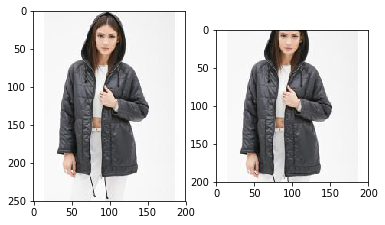

In [14]:
ax0 = plt.subplot(1,2,1)
ax0.imshow(imgOrig)

ax1 = plt.subplot(1,2,2)
ax1.imshow(imgResize)